## Data Pre Processing 

In [565]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### DataFrame Creation

In [566]:
#read data from data set 
data1 = pd.read_csv("DataSet/adult.data",header = None)


In [567]:
data2 = pd.read_csv("DataSet/adult.test", header=None, skiprows=1)
data = pd.concat([data1,data2])


In [568]:
#adding columns name from given that in adult.names file 
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week", "native-country", "income"]
#preview first five data rows from data set
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [569]:
# Saving the dataframe as a csv file for future references.
data.to_csv('dataset/adult_dataset.csv')

(48842, 15)

### Data Cleaning Process

In [ ]:
#checking for duplicates in dataset
duplicates = data[data.duplicated()]
duplicates

As you can see there are some duplicate rows. So lets remove that rows

In [ ]:
#remove duplicates data from dataset
data = data.drop_duplicates()
print(data[data.duplicated()])

As you can see now there is no duplicate values in this dataset

### Structural Errors

In [ ]:
#checking for unique values in the dataset
unique_values = data.nunique()
unique_values

In [573]:
for column in data:
    print(column)
    print(data[column].unique())
    print('\n')

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

As you can see several question marks appear as unique values in the 'work class', 'occupation', and 'native-country' columns, which seem doesn't have a meaning. Let's remove them.

In [ ]:
#create a copy and save it to data because we can replace values in direct dataset
data = data.copy()


In [575]:
# Checking the values in those columns and replacing ' ?' with pd.NA
data.replace(' ?', pd.NA, inplace=True)

In [576]:
#Check again if any ' ?' values remain in the dataset
for column in data:
    print(column)
    print(data[column].unique())
    print('\n')

There are some unnecessary blank spaces and " in object type data values let's remove it

In [ ]:
#run a loop and remove bank spaces in object type values
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = data[i].str.strip(' ')
        data[i]=data[i].str.replace(".","") #remove dots that in income column data
    


In [578]:
for column in data:
    print(column)
    print(data[column].unique())
    print('\n')

### Filling Null Values

In [ ]:
#print null value count in data
null_values = data.isnull().sum()
null_values

As you can see there are some missing values include in 3 columns 

    1. workClass :- 1836
    2. occupation :- 1843
    3. native-country :- 582

In [ ]:
#checking the values count from the "workclass" column
workclass_counts = data["workclass"].value_counts()
workclass_counts

In [581]:
# Plotting the workclass column values and their counts
plt.figure(figsize=(10, 6))
workclass_counts.plot(kind='bar')
plt.title('Workclass Value Counts')
plt.xlabel('Workclass Values')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

workclass
Private             33879
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

As the above plot we can see Private value has the higher frequencies while comparing with other values. So there we can clearly see there is data unbalance in the "workclass" column (with null values). 

In [ ]:
occupation_counts = data["occupation"].value_counts()
occupation_counts

In [583]:
# Plotting
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar')
plt.title('Occupation Value Counts')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

occupation
Prof-specialty       6167
Craft-repair         6107
Exec-managerial      6084
Adm-clerical         5608
Sales                5504
Other-service        4919
Machine-op-inspct    3019
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1487
Tech-support         1445
Protective-serv       983
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

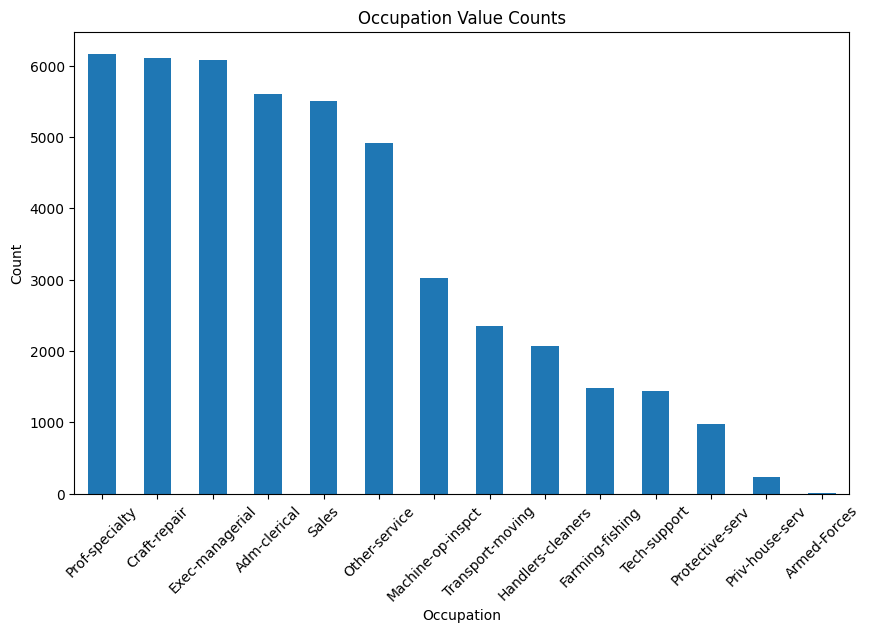

In [584]:
native_country_counts = data["native-country"].value_counts()
native_country_counts

In [585]:
# Plotting
plt.figure(figsize=(12, 8))
native_country_counts.plot(kind='bar')
plt.title('Native Country Value Counts')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()


native-country
United-States                 43810
Mexico                          947
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

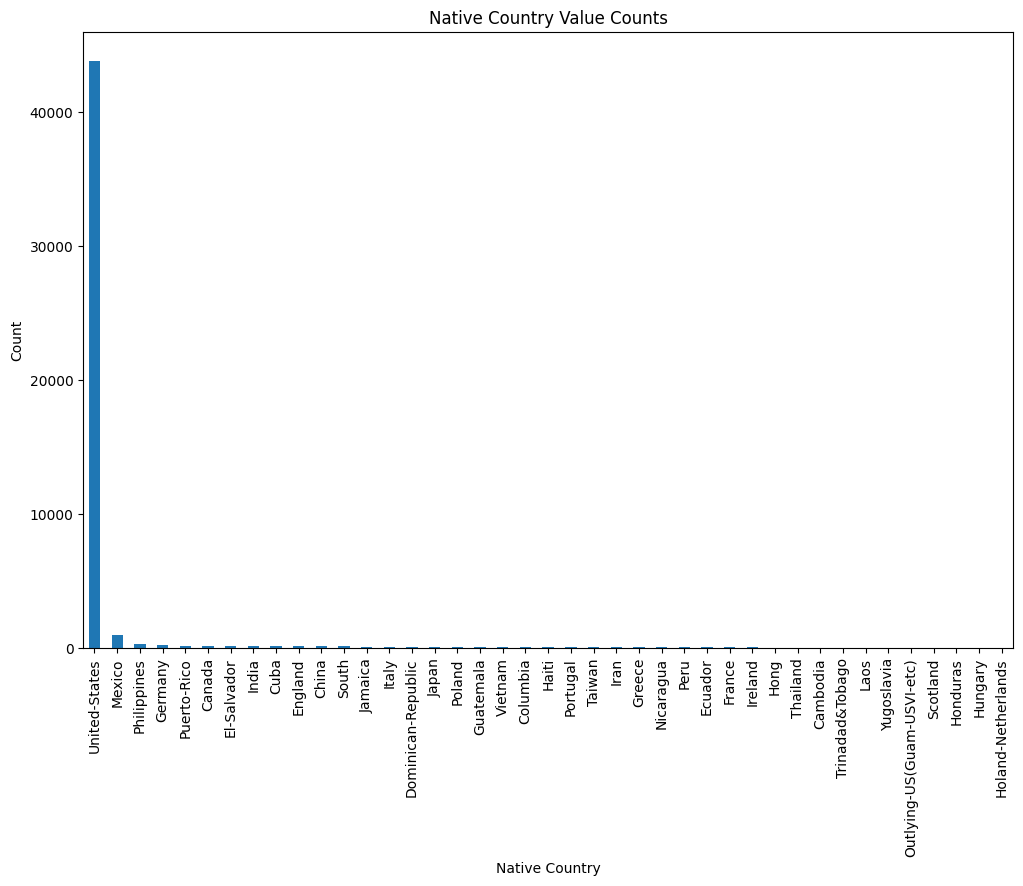

In [586]:
workclass_mode_value = data['workclass'].mode()[0]
data['workclass'].fillna(workclass_mode_value, inplace=True)

In [587]:
workclass_null_values = data["workclass"].isnull().sum()
workclass_null_values

In [588]:
data["workclass"].nunique()

0

In [589]:
workclass_counts= data["workclass"].value_counts()
# Plotting the workclass column values and their counts
plt.figure(figsize=(10, 6))
workclass_counts.plot(kind='bar')
plt.title('Workclass Value Counts')
plt.xlabel('Workclass Values')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

8

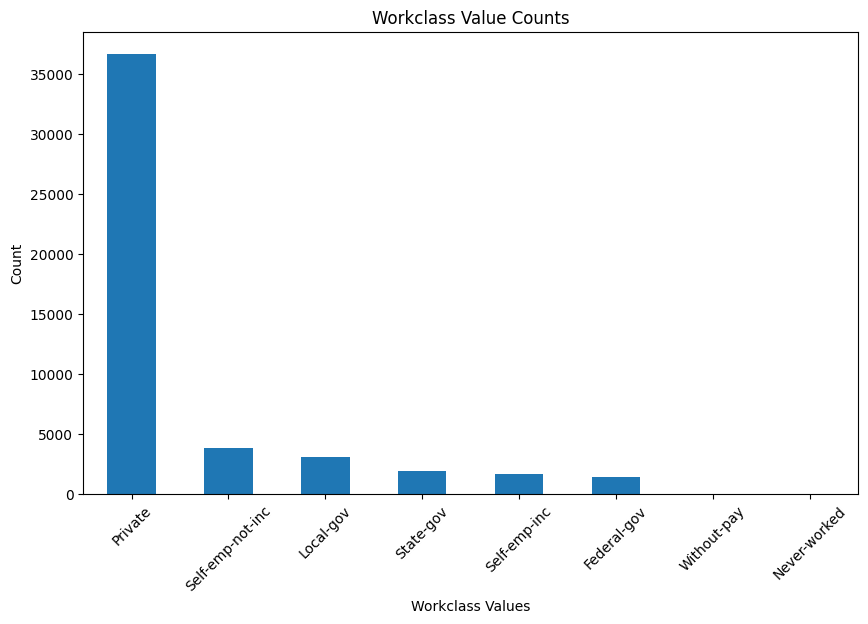

In [590]:
data = data.drop(data[(data['occupation'].isna()) & (data['income'] == '<=50K')].index)
data[(data['occupation'].isna()) & (data['income'] == '<=50K')]


In [591]:
occupation_mode_values = data['occupation'].mode()[0]
data['occupation'].fillna(occupation_mode_values, inplace=True)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [592]:
occupation_null_values = data["occupation"].isnull().sum()
occupation_null_values

In [593]:
occupation_counts = data["occupation"].value_counts()
# Plotting the workclass column values and their counts
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar')
plt.title('Occupation Value Counts')
plt.xlabel('Occupation Values')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

0

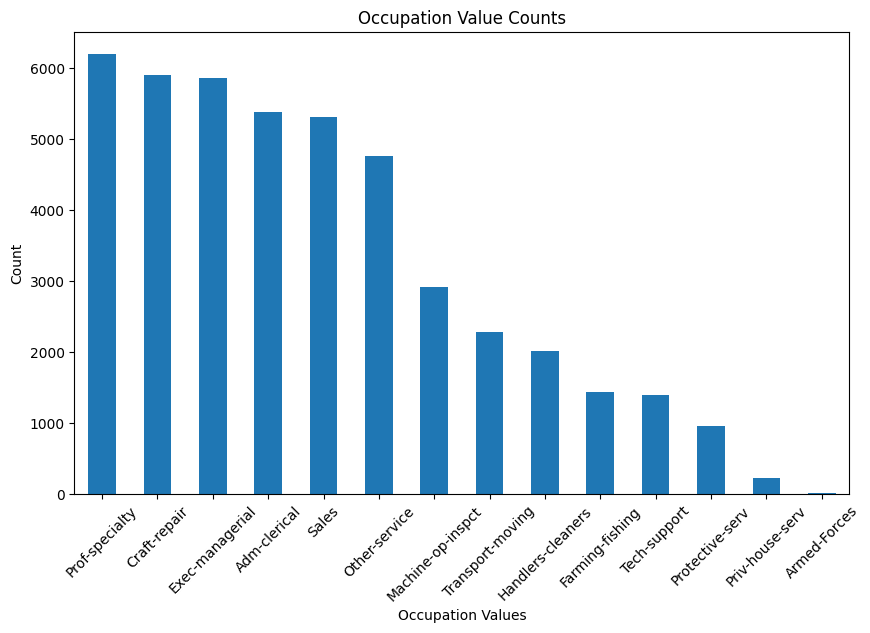

In [594]:
data.info()


In [595]:
data["native-country"].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 44635 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             44635 non-null  int64 
 1   workclass       44635 non-null  object
 2   fnlwgt          44635 non-null  int64 
 3   education       44635 non-null  object
 4   education-num   44635 non-null  int64 
 5   marital-status  44635 non-null  object
 6   occupation      44635 non-null  object
 7   relationship    44635 non-null  object
 8   race            44635 non-null  object
 9   sex             44635 non-null  object
 10  capital-gain    44635 non-null  int64 
 11  capital-loss    44635 non-null  int64 
 12  hours-per-week  44635 non-null  int64 
 13  native-country  43843 non-null  object
 14  income          44635 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.4+ MB


Considering Native country column 

In [ ]:
#count missing values for higher income people 
missing_high_income = data[data["income"]==">50K"]["native-country"].isna().sum()
missing_low_income = data[data["income"]=="<=50K"]["native-country"].isna().sum()

In [597]:
print(f'Number of missing data rows (native country) for higher income people: {missing_high_income}')
print(f'Number of missing data rows (native country) for lower income people: {missing_low_income}')

As you can see in pervious steps i removed the people who earn under 50k for the balance of the dataset therefore count for low income people are 0. Lets fill the higher income peoples' missing values by using mode 

In [ ]:
data["native-country"].fillna(data["native-country"].mode()[0],inplace=True)

In [599]:
missing_high_income = data[data["income"]=="<=50K"]["native-country"].isna().sum()
print(f'Number of missing data rows (native country) for higher income people: {missing_high_income}')

Now we filled the missing values by using mode.

In [ ]:
data.info()

As you can see now there are no missing values in the dataset.

In [ ]:
data["native-country"].value_counts()

As you can see here the most of the data is belonging to the United-states country. Therefore, by using this data it will affect the model accuracy. So the best option is remove this column to gain the accuracy of the model 

In [ ]:
data.drop(columns=['native-country'], inplace=True)
data.head()

### Capital-Loss and Capital-Gain values fix

In [ ]:
# Capital gain values
data['capital-gain'].value_counts()


In [604]:
data['capital-loss'].value_counts()

capital-gain
0        40855
15024      493
7688       400
7298       346
99999      233
         ...  
1639         1
2387         1
22040        1
1731         1
6612         1
Name: count, Length: 121, dtype: int64

As you can see, there are huge zero values in the capital loss and capital gain columns. It will affect the model accuracy when we train the model. Therefore, the best option is to remove the capital-gain and capital-loss columns. 

In [ ]:
data.drop(columns=['capital-loss','capital-gain'], inplace=True)
data

## Outlier Handling

### Age outliers

In [ ]:
# Create a box plot for age feature
plt.figure(figsize=(8, 6))
plt.boxplot(data['age'])
plt.title('Box plot of age data')
plt.xlabel('age')
plt.ylabel('Values')
plt.show()

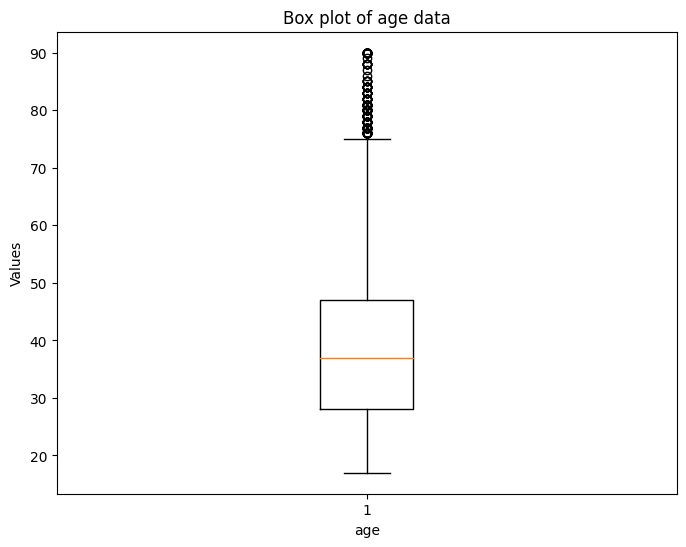

In [607]:
# Upper Bound of the Dataset

# Calculate Q1, Q3, and IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker value
upper_whisker = Q3 + 1.5 * IQR

# Find the highest data point within the upper whisker range
upper_bound_data = data['age'][data['age'] <= upper_whisker].max()

print("Upper bound within the boxplot:", upper_bound_data)

As you can see, there are several outliers above the upperbound. So lets check whether those are really outliers or not and get remove them from dataset.

In [ ]:
# Visualizing the Data of people above age 75
above75_high_income = data[(data['age'] >= 75) & (data['income'] == '>50K')]['age'].value_counts()
above75_low_income = data[(data['age'] >= 75) & (data['income'] == '<=50K')]['age'].value_counts()
print(f'people who earn more than 50k and above the age 75:- {above75_high_income.sum()}')
print(f'people who earn below 50k and above the age 75:- {above75_low_income.sum()}')

In [609]:
# Let's check how people will earn throughout the aging with KDE (Kernal Density Estimation)
above50k_earn = data[data['income'] == '>50K']['age']
plt.figure(figsize=(22, 5))
plt.title("people who earn more than 50k throughout the ages")
sns.histplot(above50k_earn,kde=True, label=column)

below50k_earn = data[data['income'] == '<=50K']['age']
plt.figure(figsize=(22, 5))
plt.title("people who earn less than 50k throughout the ages")
sns.histplot(below50k_earn,kde=True, label=column)

people who earn more than 50k and above the age 75:- 68
people who earn below 50k and above the age 75:- 250


Analyzing both graphs, we can see that the people who earn more than 50k are somewhat similar to normal distribution. But when it comes to people who earn less than 50k, there is a huge decreasing when it comes to aging. Therefore, we can remove them as outliers.

In [ ]:
# Let's drop the outliers of the people who earn more than 50K and see the distribution as well as the boxplot
data = data.drop(data[(data['age'] >= 75) & (data['income'] == '>50K')].index)

# Distribution
above50k_earn = data[data['income'] == '>50K']['age']
plt.figure(figsize=(28, 6))
plt.title("people who earn more than 50k throughout out the ages")
sns.histplot(above50k_earn,kde=True, label=column)

<Axes: title={'center': 'people who earn more than 50k throughout out the ages'}, xlabel='age', ylabel='Count'>

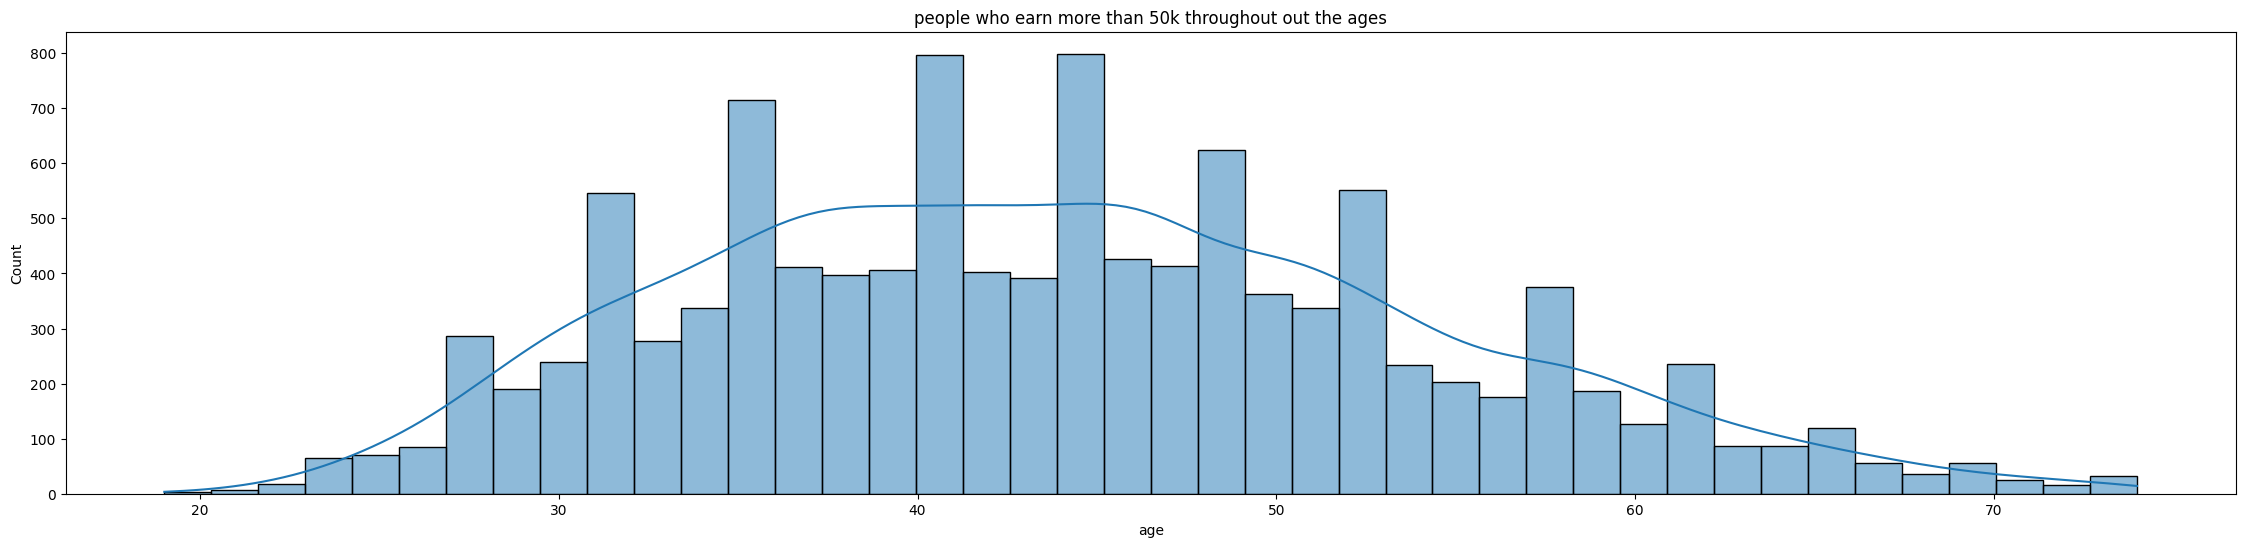

In [611]:
data = data.drop(data[(data['age'] >= 75) & (data['income'] == '<=50K')].index)
below50k_earn = data[data['income'] == '<=50K']['age']
plt.figure(figsize=(22, 5))
plt.title("people who earn less than 50k throughout the ages")
sns.histplot(below50k_earn,kde=True, label=column)

Now we can see that the people who earn more than 50k throughout the ages take a normal distribution which indicates now the age class is balanced.

In [ ]:
# Boxplot after cleaning the outliers
# Create a box plot for age feature
plt.figure(figsize=(8, 6))
plt.boxplot(data['age'])
plt.title('Box plot of age data')
plt.xlabel('age')
plt.ylabel('Values')
plt.show()

### Final weight outliers

In [ ]:
# Boxplot to see outliers of the final weight column
# Create a box plot for fnlwgt feature
plt.figure(figsize=(8, 6))
plt.boxplot(data['fnlwgt'])
plt.title('Box plot of final weight data')
plt.xlabel('final weight')
plt.ylabel('Values')
plt.show()

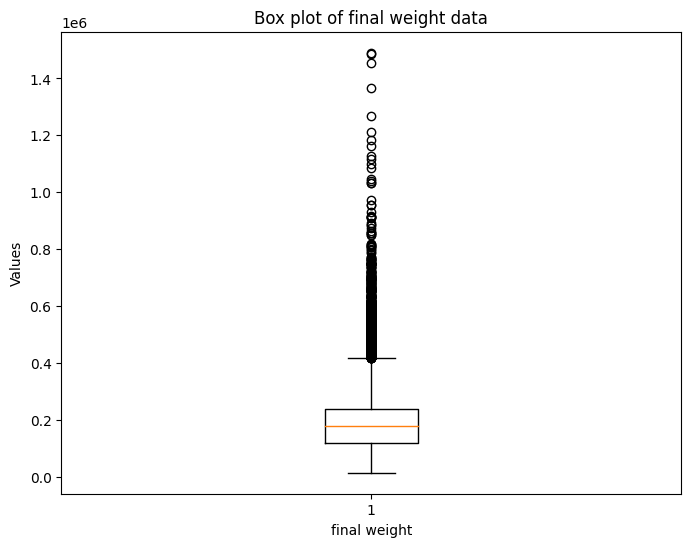

In [614]:
# Upper Bound of the Dataset

# Calculate Q1, Q3, and IQR
Q1 = data['fnlwgt'].quantile(0.25)
Q3 = data['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker value
upper_whisker = Q3 + 1.5 * IQR

# Find the highest data point within the upper whisker range
upper_bound_data = data['fnlwgt'][data['fnlwgt'] <= upper_whisker].max()

print("Upper bound within the boxplot:", upper_bound_data)

# Number of records upper the bound of the dataset\
fnlwgt_outliers = data[data['fnlwgt'] >= 417419].value_counts().sum()
print(f'number of outliers :- {fnlwgt_outliers}')

In [615]:
# Removing the final weight outliers
adult_dataset = data.drop(data[data['fnlwgt'] >= 417419].index)

Upper bound within the boxplot: 418176
number of outliers :- 1334


In [616]:
# Boxplot to see outliers of the final weight column
# Create a box plot for fnlwgt feature
plt.figure(figsize=(8, 6))
plt.boxplot(adult_dataset['fnlwgt'])
plt.title('Box plot of final weight data')
plt.xlabel('final weight')
plt.ylabel('Values')
plt.show()

### Working hours per-week outliers

In [ ]:
# Create a box plot for working hours feature
plt.figure(figsize=(8, 6))
plt.boxplot(data['hours-per-week'])
plt.title('Box plot of working hours data')
plt.xlabel('hours-per-week')
plt.ylabel('Values')
plt.show()

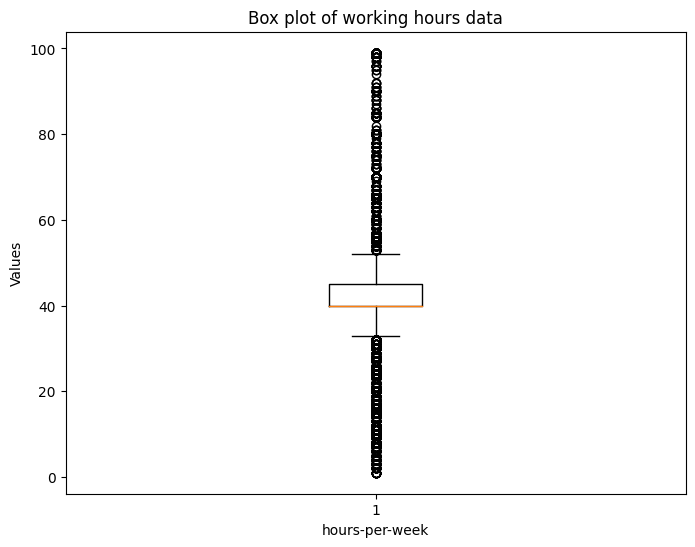

In [618]:
data.head()


### Label Encoder

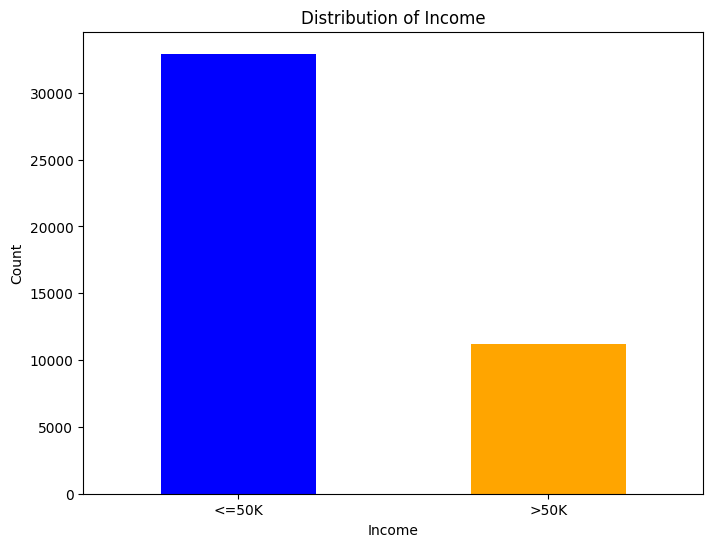

In [620]:
# Define the categorical columns to be encoded
categorical_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','income']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

### Principal component analysis

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data.drop(columns=["income"]))

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

num_components = np.argmax(cumulative_variance >= 0.95) + 1

print("Number of components to capture 95% of variance :", num_components)

income
<=50K    32931
>50K     32931
Name: count, dtype: int64


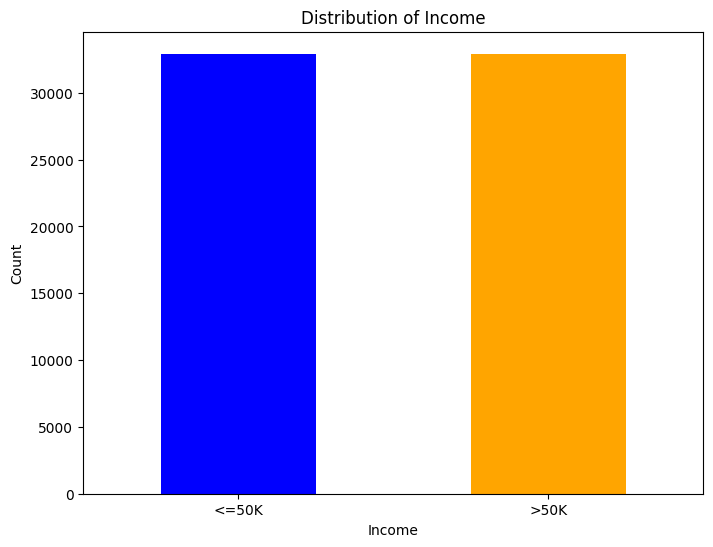

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.axvline(x= num_components, color='r', linestyle='--', label=f'{num_components} components (95% variance)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns

correlation = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, vmax=0.8, square=True, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [ ]:
pca = PCA(n_components=9)
new_data = pca.fit_transform(data)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9'])

In [ ]:
principal_Df.head()

PCA()

In [ ]:
from sklearn.model_selection import train_test_split

Number of components to capture 95% of variance : 1


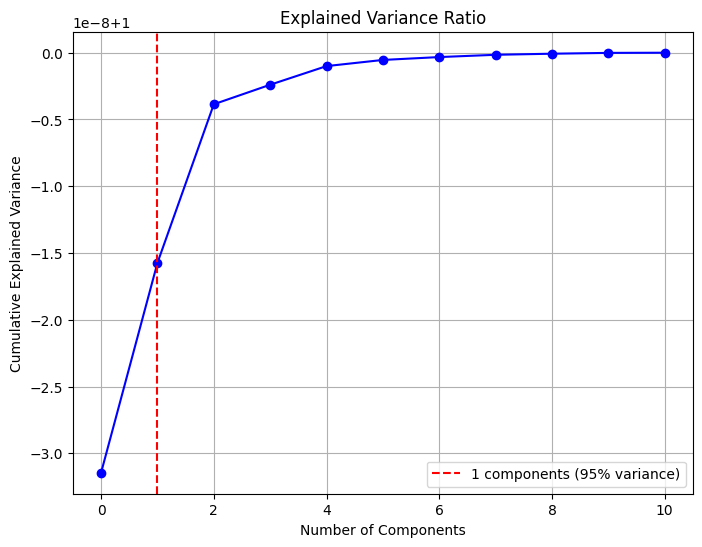

In [ ]:
# X = data[["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
#            "occupation", "relationship", "race", "sex", 
#            "hours-per-week"]]
# y =  data["income"]

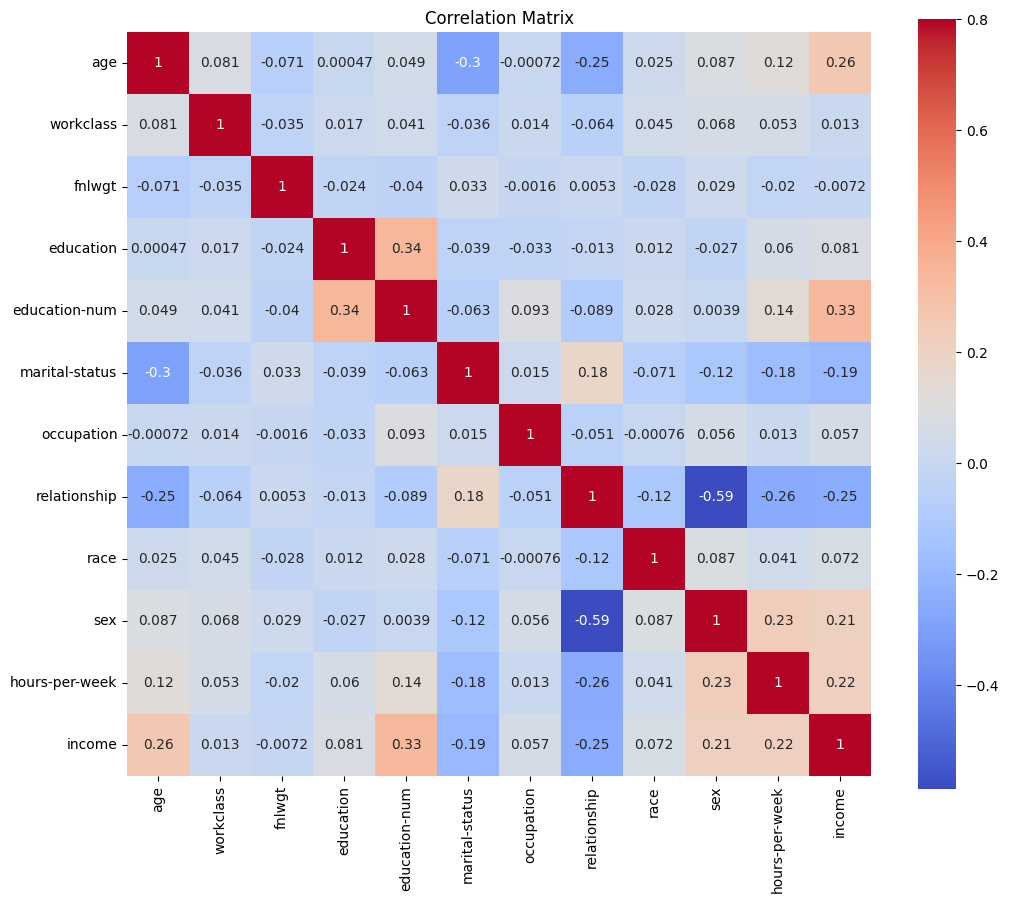

In [ ]:
X = principal_Df
y = data["income"]

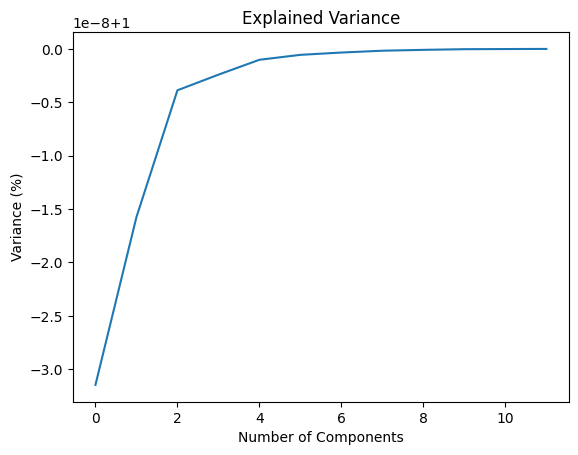

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9
0,-112499.820159,-0.909024,-0.913200,-5.365387,1.777377,-3.670059,0.073186,1.639507,2.758391
1,-106704.820193,-5.193110,-29.691094,-2.478601,0.115520,-3.987717,-2.059826,0.217462,1.711183
2,25630.179845,-0.507571,-0.765988,-1.166512,-0.065483,1.096413,-1.555396,-2.198195,-0.160585
3,44705.179727,12.324248,-8.780722,1.523121,9.665324,-0.231527,-0.942471,0.209470,-0.476121
4,94566.179846,-0.907308,-0.347073,-3.424645,-2.216199,-3.228348,3.214469,-1.920597,0.011031


In [ ]:
# Train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate models
print("Naïve Bayes Model:")
print(classification_report(y_test, nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred))

print("\nRandom Forest Model:")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))

In [ ]:
# X = data[["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
#            "occupation", "relationship", "race", "sex", 
#            "hours-per-week"]]
# y =  data["income"]

In [ ]:
X = principal_Df
y = data["income"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate models
print("Naïve Bayes Model:")
print(classification_report(y_test, nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred))

print("\nRandom Forest Model:")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))

Naïve Bayes Model:
              precision    recall  f1-score   support

           0       0.78      0.97      0.87     10949
           1       0.73      0.21      0.33      3751

    accuracy                           0.78     14700
   macro avg       0.76      0.59      0.60     14700
weighted avg       0.77      0.78      0.73     14700

Accuracy: 0.778843537414966

Random Forest Model:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     10949
           1       0.78      0.64      0.70      3751

    accuracy                           0.86     14700
   macro avg       0.83      0.79      0.81     14700
weighted avg       0.86      0.86      0.86     14700

Accuracy: 0.8623809523809524


In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, nb_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10662   287]
 [ 2964   787]]


In [ ]:
data["income"].value_counts()

income
0    32931
1    11169
Name: count, dtype: int64